# Plotting on Data Aware grids

When exploring a medium dimensional data,It is usually a better approach to divide the data into multiple pieces and then getting a plot.This kind of plotting is called as trellis plotting or lattice plotting
But to do this data must be in a pandas dataframe and it should be 'tidy data'.

If you can recall this trellis plotting is the one which is deprecated from pandas plotting.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats # we imported stats too
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

# Plotting small multiples of data subsets

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


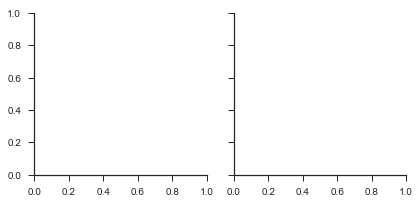

In [4]:
g = sns.FacetGrid(tips,col = 'time')

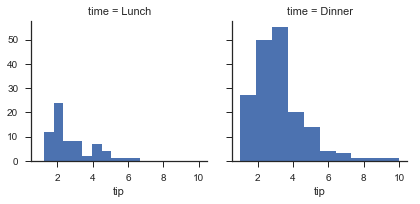

In [5]:
g = sns.FacetGrid(tips,col = 'time')
g.map(plt.hist,'tip')

# what is the need for them to follow eachother?

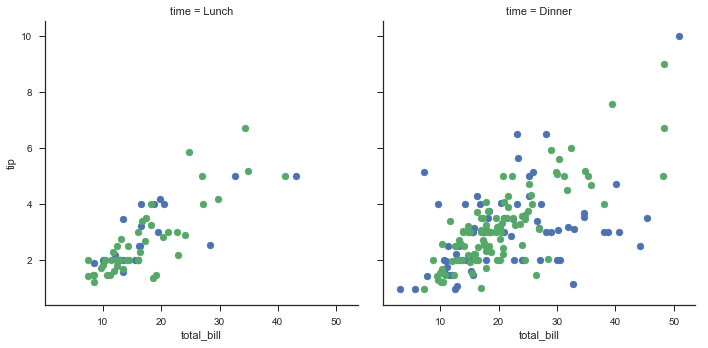

In [6]:
g = sns.FacetGrid(tips,col = 'time',hue = 'smoker',size = 5)
g.map(plt.scatter,'total_bill','tip')

# Recap you dont need to x = 'total_bill' and y = 'tip'.
# observe that there is no legend

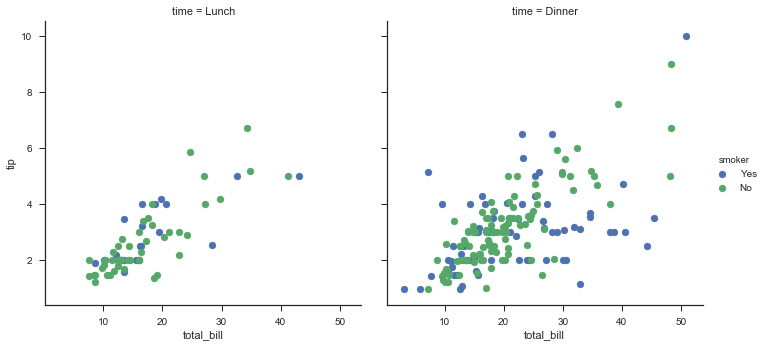

In [7]:
g = sns.FacetGrid(tips,col = 'time',hue = 'smoker',size = 5)
g.map(plt.scatter,'total_bill','tip')
g.add_legend()

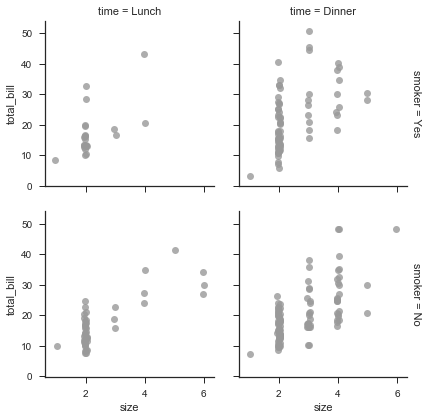

In [8]:
g = sns.FacetGrid(tips,row = 'smoker',col ='time',margin_titles = True)
g.map(sns.regplot,'size','total_bill',color = '0.6',x_jitter = 0.05,fit_reg = False)

# If I am not going to put a regression parameter on the regression how different is it from normal scatter plot?
# margin_titles is a Matplotlib argument 

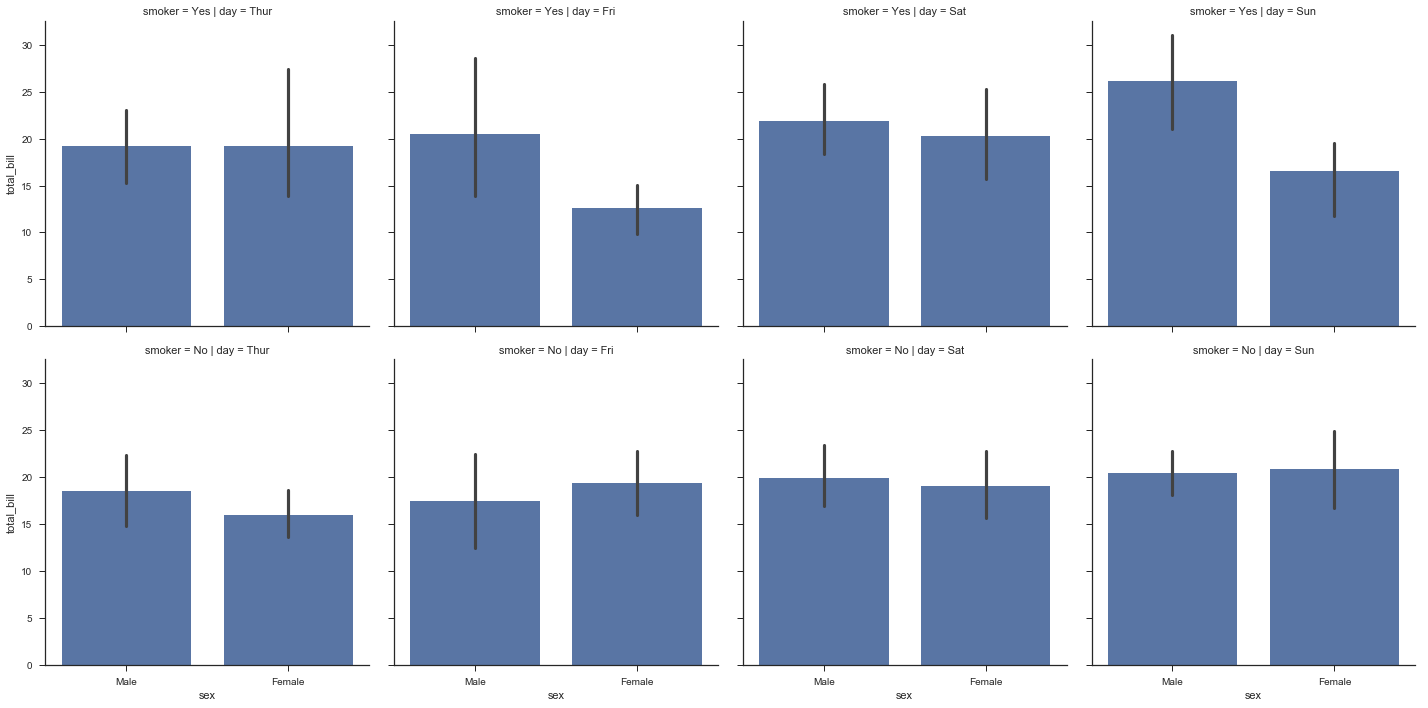

In [9]:
g = sns.FacetGrid(tips,row = 'smoker', col="day", size=5, aspect=1)
g.map(sns.barplot, "sex", "total_bill")

In [10]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [11]:
titanic = titanic.assign(deck=titanic.deck.astype(object))
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


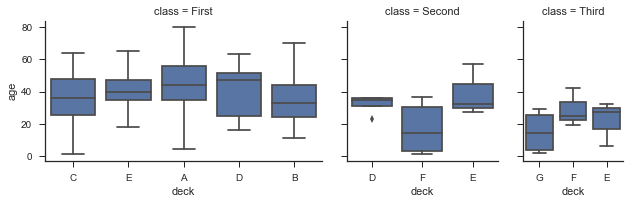

In [12]:
g = sns.FacetGrid(titanic,col = 'class',sharex = False,gridspec_kws = {'width_ratios': [11,6,4]})
g.map(sns.boxplot,'deck','age')
# Any kind of arguments that will be given that modify the layout of Facetgrid should be given there itself
# The arguments that are defined to get plot should be given in map function
# sharex false should be given.

In [13]:
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
# I didn't understand the essence of this commanand exactly

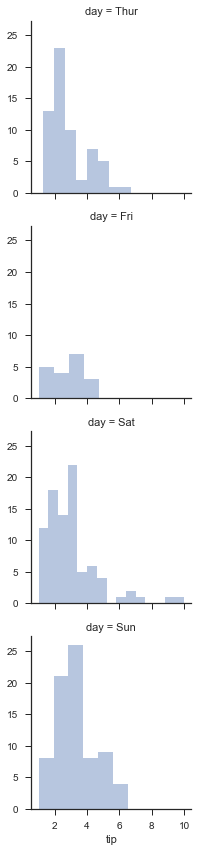

In [14]:
g = sns.FacetGrid(tips,row = 'day')
g.map(sns.distplot,'tip',kde = False)

Row order you are getting is adjusted not came by as the order it is seen.

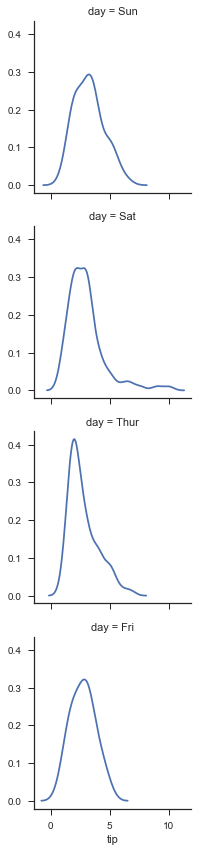

In [15]:
ordered_days = tips.day.unique()
g = sns.FacetGrid(tips,row = 'day',row_order = ordered_days)
g.map(sns.distplot,'tip',hist = False)

In documentation there is value_counts method to obtain row order but this is more convienient.

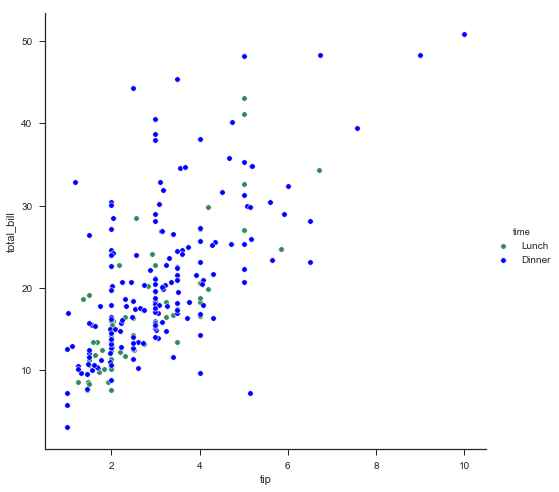

In [16]:
palte = {'Lunch' : 'seagreen','Dinner' : 'blue'}
g = sns.FacetGrid(tips,hue = 'time',palette = palte,size = 7)
g.map(plt.scatter,'tip','total_bill',s = 30,linewidth = 0.55,edgecolor = 'white')
g.add_legend()

# Linewidth specifies the size of markings
# edgecolor specifies the color of markings but is clearly visible ony when size of markings is high

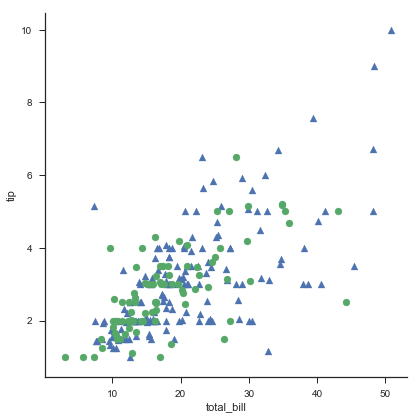

In [17]:
g = sns.FacetGrid(tips,hue = 'sex',hue_kws ={'marker' : ['^','o']},size  = 6)
g.map(plt.scatter,'total_bill','tip')

In [18]:
#Let's see what is in attention dataset
attend = sns.load_dataset('attention')
attend

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


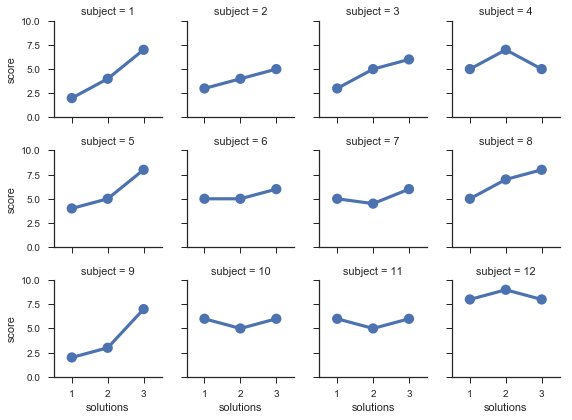

In [19]:
cols = attend.query('subject<=12')
g = sns.FacetGrid(cols,col = 'subject',col_wrap = 4,size = 2,ylim = (0,10))
g.map(sns.pointplot,'solutions','score')

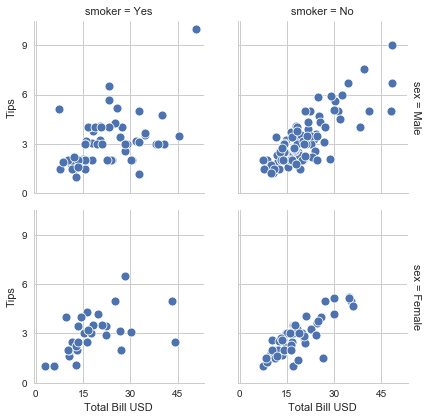

In [20]:
with sns.axes_style('whitegrid'):
    g=sns.FacetGrid(tips,row = 'sex',col = 'smoker',margin_titles = True,size = 3)
g.map(plt.scatter,'total_bill','tip',edgecolor = 'white',s = 80,linewidth = 0.8)
g.set_axis_labels('Total Bill USD','Tips')
g.set(yticks = [0,3,6,9],xticks = [0,15,30,45])
g.fig.subplots_adjust(wspace = 0.2,hspace = 0.1)
# Last attributes wspace and hspace are width gap between plots and horizontal or height gap between plots respectively.

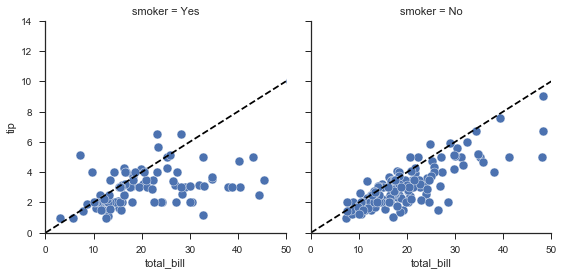

In [21]:
g = sns.FacetGrid(tips , col = 'smoker',margin_titles = True,size = 4)
g.map(plt.scatter,'total_bill','tip',lw = 0.4,s = 80,edgecolor = 'white')
for ax in g.axes.flat:
    ax.plot((0,50),(0,0.2*50),c = 'k',ls = '--')
g.set(xlim = [0,50],ylim = [0,14])

That for for command is to specify additional plots that needs to be drawn on the existing plots.It is repsonsible for the line starting from origin.

# Mapping custom functions onto the grid

I think these functions are not useful for a beginner right now.so we shall just skim through them as of now.

# Quantile plot

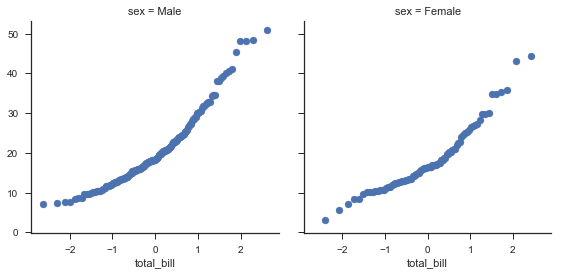

In [22]:
def quantile_plot(x,**k):
    qntls,xr = stats.probplot(x,fit = False)
    plt.scatter(qntls,xr,**k)
    
g = sns.FacetGrid(tips,col = 'sex',size = 4)
g.map(quantile_plot,'total_bill')

To understand this we need an understanding of probplot which I think is not required for a beginner.

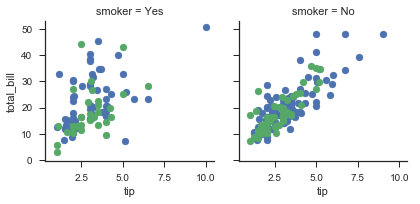

In [23]:
#Bivariate plot can be drawn using qqplot command
def qqplot(x,y,**k):
    xr = stats.probplot(x,fit = False)
    yr = stats.probplot(y,fit = False)
    plt.scatter(x,y,**k)
    
g = sns.FacetGrid(data = tips,col = 'smoker',hue = 'sex')
g.map(qqplot,'tip','total_bill')

Adding legend,color and modifying size can also be done.
Adding Markers,edgecolor,linewidth,bw etc are all same as the normal seaborn function.

what we are doing here is that we are just defining a function and just like plt.scatter or something like that and call it in map function.

There are some other higher functions by custom building functions.For example if we want to change some kind of parameter in a function then we can do it while building the function itself.
See the example below which is copied from documentation

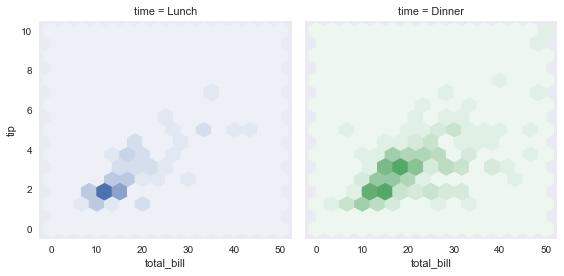

In [24]:
# Copied from document

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
# We defined properties of hex bin here itself.

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

# Plotting pairwise relationships in a dataset

For Plotting pairwise relationships we have facetgrids and pairplots.but we have some minute differences in both of them.

A facetgrid plots a same relationship with different varaibles on same facet whereas plotgrids plot different relationships on different plots

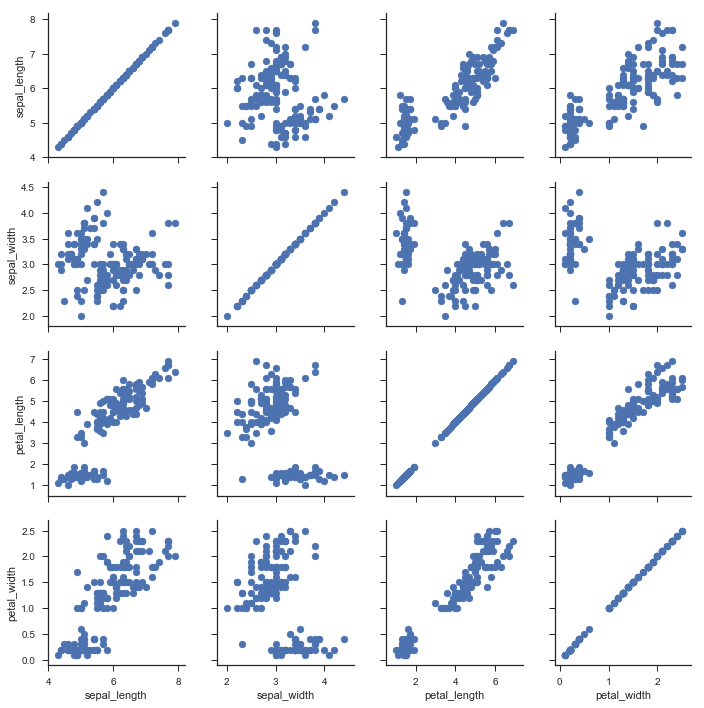

In [25]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

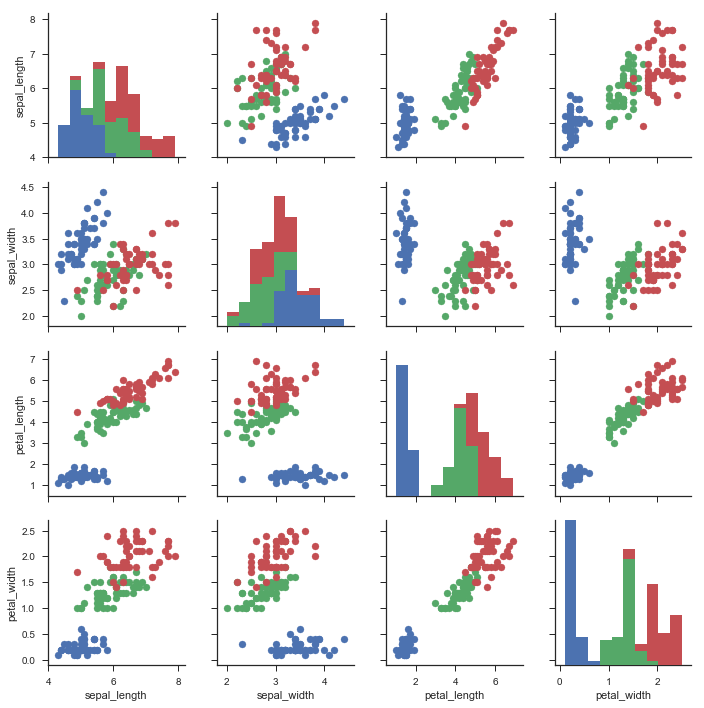

In [26]:
g = sns.PairGrid(iris,hue = 'species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Everything is just like you used pairgrid earlier.

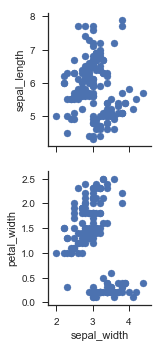

In [27]:
# You can only pair specific columns and rows if you want to.

g = sns.PairGrid(iris,x_vars = ['sepal_width'],y_vars = ['sepal_length','petal_width'])
g.map(plt.scatter)

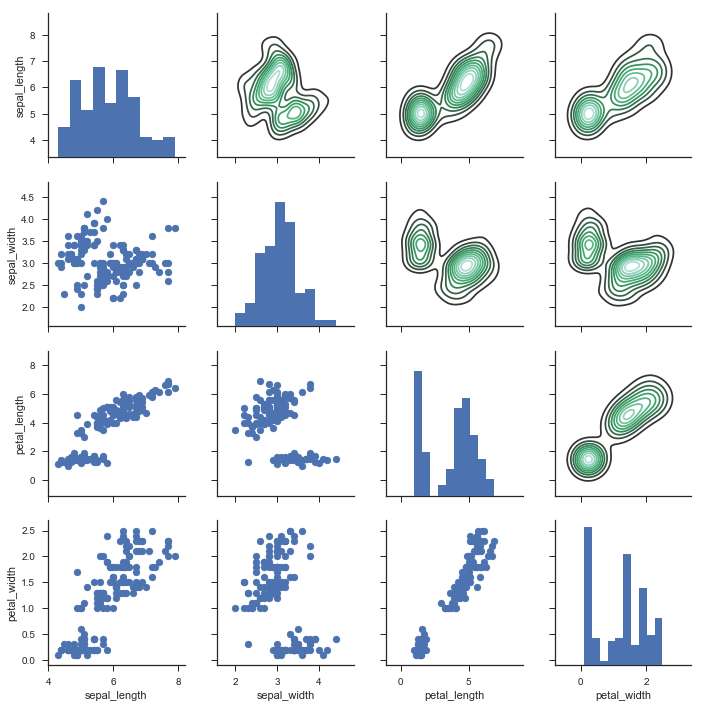

In [28]:
# You can specify lower and upper triangles

g = sns.PairGrid(iris)
g.map_lower(plt.scatter)
g.map_diag(plt.hist)
g.map_upper(sns.kdeplot)

pairplot() is more comfortable than pairgrid()

Guess why?

Because for Pairgrid function we need to call map everytime we are invoking it.if you use pairplot we can directly call the function.